In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import pywt
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [59]:
directory = "C:\\Users\\Rohit\\Desktop\\LAB WORK(IMP)\\EE610\\Assignment\\EE610-Image-Processing\\Assignment2\\BDS500\\train\\"
img_train = []
ids_img_train = []
for filename in os.listdir(directory):
    ids_img_train.append(int(filename[:-4]))
    img_train.append(cv2.imread(directory + filename))

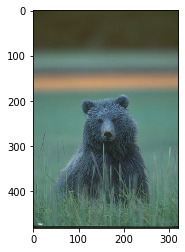

In [60]:
plt.imshow(img_train[1])
plt.show()

In [75]:
model = models.Sequential()#creating a sequential model
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))#first level conv
model.add(layers.MaxPooling2D((2, 2)))#Add dwt here instead
model.add(layers.Conv2D(128, (1,1), activation='relu', padding = 'same'))# to downsample the number of feature maps
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))#Add dwt here
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))

TypeError: add() got an unexpected keyword argument 'trainable_variables'

In [74]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 128)       8320      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)        

In [15]:
pywt.dwt2(img_train[1], 'haar');

In [26]:
coef = pywt.wavedec2(img_train[1], 'haar', mode='symmetric', level=2, axes=(-2, -1))

In [28]:
coef.

AttributeError: 'list' object has no attribute 'length'

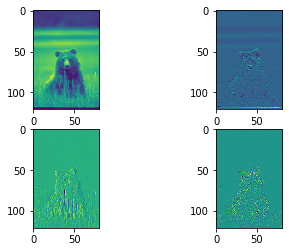

In [18]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(cA)#og image
axarr[0,1].imshow(cH)#horizontal components
axarr[1,0].imshow(cV)#horizontal components
axarr[1,1].imshow(cD)#high frequency components.

In [38]:
def DWT(input_img, level=2):
    cA, (cH, cV, cD) = pywt.dwt2(input_img, 'haar')
    mul_dwt = []
    idwt_pack = []
    mul_dwt.append([cA, cH, cV, cD])
    idwt_pack.append([cA, (cH, cV, cD)])
    for i in range(1, level):
        for j in mul_dwt[i-1]:
            cA, (cH, cV, cD) = pywt.dwt2(input_img, 'haar')
            mul_dwt.append([cA, cH, cV, cD]) 
            idwt_pack.append([cA, (cH, cV, cD)])
    return mul_dwt, idwt_pack

In [ ]:
def IDWT(coef, level):
    start = len(coef) - 4^(level-1)
    
    

In [57]:
x, y = DWT(img_train[1], 2)



In [76]:
import keras.backend as K
from keras.layers import Layer


def dwt(x, data_format='channels_last'):

    """
    DWT (Discrete Wavelet Transform) function implementation according to
    "Multi-level Wavelet Convolutional Neural Networks"
    by Pengju Liu, Hongzhi Zhang, Wei Lian, Wangmeng Zuo
    https://arxiv.org/abs/1907.03128
    """

    if data_format == 'channels_last':
        x1 = x[:, 0::2, 0::2, :] #x(2i−1, 2j−1)
        x2 = x[:, 1::2, 0::2, :] #x(2i, 2j-1)
        x3 = x[:, 0::2, 1::2, :] #x(2i−1, 2j)
        x4 = x[:, 1::2, 1::2, :] #x(2i, 2j)

    elif data_format == 'channels_first':
        x1 = x[:, :, 0::2, 0::2] #x(2i−1, 2j−1)
        x2 = x[:, :, 1::2, 0::2] #x(2i, 2j-1)
        x3 = x[:, :, 0::2, 1::2] #x(2i−1, 2j)
        x4 = x[:, :, 1::2, 1::2] #x(2i, 2j)     

    x_LL = x1 + x2 + x3 + x4
    x_LH = -x1 - x3 + x2 + x4
    x_HL = -x1 + x3 - x2 + x4
    x_HH = x1 - x3 - x2 + x4

    if data_format == 'channels_last':
        return K.concatenate([x_LL,x_LH,x_HL,x_HH],axis=-1)
    elif data_format == 'channels_first':
        return K.concatenate([x_LL,x_LH,x_HL,x_HH],axis=1)


def iwt(x, data_format='channels_last'):
    """
    IWT (Inverse Wavelet Transfomr) function implementation according to
    "Multi-level Wavelet Convolutional Neural Networks"
    by Pengju Liu, Hongzhi Zhang, Wei Lian, Wangmeng Zuo
    https://arxiv.org/abs/1907.03128
    """
    if data_format == 'channels_last':

        x_LL = x[:, :, :, 0:x.shape[3]//4]
        x_LH = x[:, :, :, x.shape[3]//4:x.shape[3]//4*2]
        x_HL = x[:, :, :, x.shape[3]//4*2:x.shape[3]//4*3]
        x_HH = x[:, :, :, x.shape[3]//4*3:]

        x1 = (x_LL - x_LH - x_HL + x_HH)/4
        x2 = (x_LL - x_LH + x_HL - x_HH)/4
        x3 = (x_LL + x_LH - x_HL - x_HH)/4
        x4 = (x_LL + x_LH + x_HL + x_HH)/4 

        y1 = K.stack([x1,x3], axis=2)
        y2 = K.stack([x2,x4], axis=2)
        shape = K.shape(x)
        return K.reshape(K.concatenate([y1,y2], axis=-1), K.stack([shape[0], shape[1]*2, shape[2]*2, shape[3]//4]))

    elif data_format == 'channels_first':

        raise RuntimeError('WIP, please use "channels_last" instead.')

        x_LL = x[:, 0:x.shape[1]//4, :, :]
        x_LH = x[:, x.shape[1]//4:x.shape[1]//4*2, :, :]
        x_HL = x[:, x.shape[1]//4*2:x.shape[1]//4*3, :, :]
        x_HH = x[:, x.shape[1]//4*3:, :, :]

        x1 = (x_LL - x_LH - x_HL + x_HH)/4
        x2 = (x_LL - x_LH + x_HL - x_HH)/4
        x3 = (x_LL + x_LH - x_HL - x_HH)/4
        x4 = (x_LL + x_LH + x_HL + x_HH)/4 

        y1 = K.stack([x1,x3], axis=3)
        y2 = K.stack([x2,x4], axis=3)
        shape = K.shape(x)
        return K.reshape(K.concatenate([y1,y2], axis=1), K.stack([shape[0], shape[1]//4, shape[2]*2, shape[3]*2]))



class DWT_Pooling(Layer):
    """
    Custom Layer performing DWT pooling operation described in :
    "Multi-level Wavelet Convolutional Neural Networks"
    by Pengju Liu, Hongzhi Zhang, Wei Lian, Wangmeng Zuo
    https://arxiv.org/abs/1907.03128
    # Arguments :
        data_format (String): 'channels_first' or 'channels_last'
    # Input shape :
        If data_format='channels_last':
            4D tensor of shape: (batch_size, rows, cols, channels)
        If data_format='channels_first':
            4D tensor of shape: (batch_size, channels, rows, cols)
    # Output shape
        If data_format='channels_last':
            4D tensor of shape: (batch_size, rows/2, cols/2, channels*4)
        If data_format='channels_first':
            4D tensor of shape: (batch_size, channels*4, rows/2, cols/2)
    """

    def __init__(self, data_format=None,**kwargs):
        super(DWT_Pooling, self).__init__(**kwargs)
        self.data_format = K.normalize_data_format(data_format)

    def build(self, input_shape):
        super(DWT_Pooling, self).build(input_shape) 

    def call(self, x):
        return dwt(x, self.data_format)

    def compute_output_shape(self, input_shape):
        if self.data_format == 'channels_first':
            return (input_shape[0], input_shape[1]*4, input_shape[2]//2, input_shape[3]//2)
        elif self.data_format == 'channels_last':
            return (input_shape[0], input_shape[1]//2, input_shape[2]//2, input_shape[3]*4)


class IWT_UpSampling(Layer):
    """
    Custom Layer performing IWT upsampling operation described in :
    "Multi-level Wavelet Convolutional Neural Networks"
    by Pengju Liu, Hongzhi Zhang, Wei Lian, Wangmeng Zuo
    https://arxiv.org/abs/1907.03128
    # Arguments :
        data_format (String): 'channels_first' or 'channels_last'
    # Input shape :
        If data_format='channels_last':
            4D tensor of shape: (batch_size, rows, cols, channels)
        If data_format='channels_first':
            4D tensor of shape: (batch_size, channels, rows, cols)
    # Output shape
        If data_format='channels_last':
            4D tensor of shape: (batch_size, rows*2, cols*2, channels/4)
        If data_format='channels_first':
            4D tensor of shape: (batch_size, channels/4, rows*2, cols*2)
    """

    def __init__(self, data_format=None, **kwargs):
        super(IWT_UpSampling, self).__init__(**kwargs)
        self.data_format = K.normalize_data_format(data_format)

    def build(self, input_shape):
        super(IWT_UpSampling, self).build(input_shape) 

    def call(self, x):
        return iwt(x, self.data_format)

    def compute_output_shape(self, input_shape):
        if self.data_format == 'channels_first':
            return (input_shape[0], input_shape[1]//4, input_shape[2]*2, input_shape[3]*2)
        elif self.data_format == 'channels_last':
            return (input_shape[0], input_shape[1]*2, input_shape[2]*2, input_shape[3]//4)

Using TensorFlow backend.


In [77]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

def unet(input_size = (400,400,1)):

    def down_block(input_layer, filters, kernel_size=(3,3), activation="relu"):
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(input_layer)
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(output)
        return output, MaxPooling2D(pool_size=(2,2))(output)


    def up_block(input_layer, residual_layer, filters, kernel_size=(3,3),activation="relu"):
        output = UpSampling2D(size = (2,2))(input_layer)
        output = Concatenate(axis = 3)([residual_layer,output])
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(output)
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(output)
        return output

    inputs = Input(shape = input_size)

    down1, pool1 = down_block(inputs,64)
    down2, pool2 = down_block(pool1,128)
    down3, pool3 = down_block(pool2,256)
    down4, pool4 = down_block(pool3,512)

    down5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same", activation ="relu")(pool4)
    down5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same", activation ="relu")(down5)

    up = up_block(down5,down4,512)
    up = up_block(up,down3,256)
    up = up_block(up,down2,128)
    up = up_block(up,down1,64)

    output = Conv2D(filters=input_size[2], kernel_size=(1, 1), padding="same")(up)
    model = Model(input = inputs, output = output)
    
    return model

In [79]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Add
#from models.DWT import DWT_Pooling, IWT_UpSampling

def unetWavelet(input_size = (400,400,1)):

    def down_block(input_layer, filters, kernel_size=(3,3), activation="relu"):
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(input_layer)
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(output)
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(output)
        return output, DWT_Pooling()(output)


    def up_block(input_layer, residual_layer, filters, kernel_size=(3,3),activation="relu"):
        output = IWT_UpSampling()(input_layer)
        output = Add()([residual_layer,output])
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(output)
        output = Conv2D(filters, kernel_size, padding="same", activation=activation)(output)
        output = Conv2D(filters*2, kernel_size, padding="same", activation=activation)(output)
        return output

    inputs = Input(shape = input_size)

    down1, pool1 = down_block(inputs,64)
    down2, pool2 = down_block(pool1,128)
    down3, pool3 = down_block(pool2,256)
    down4, pool4 = down_block(pool3,512)

    down5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same", activation ="relu")(pool4)
    down5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same", activation ="relu")(down5)
    down5 = Conv2D(filters=2048, kernel_size=(3, 3), padding="same", activation ="relu")(down5)

    up = up_block(down5,down4,512)
    up = up_block(up,down3,256)
    up = up_block(up,down2,128)
    up = up_block(up,down1,64)

    output = Conv2D(filters=input_size[2], kernel_size=(1, 1), padding="same")(up)
    model = Model(input = inputs, output = output)
    
    return model

In [80]:
model = unetWavelet()

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [81]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 400, 400, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 400, 400, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 400, 400, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 400, 400, 64) 36928       conv2d_2[0][0]                   
____________________________________________________________________________________________

In [85]:
from keras.utils import Sequence
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import keras.backend as K


class CustomGenerator(Sequence):

    """
    Custom Generator for Denoising Application :
    Returns pairs of noisy images and the corresponding residual images (the noise).
    # Arguments :
        img_path (String) : List of the path to the images of the dataset
        noise_level (int) : Variance of the Gaussian Noise to add to the images
        batch_size (int)
        cropShape (int, int, int) : Shape of the input image of the model
        shuffle (bool) : Shuffle image order at each epoch
    """

    def __init__(self, img_path, noise_level, batch_size, cropShape, shuffle=True):
        self.img_path = img_path
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.cropShape = cropShape
        self.indexes = np.arange(len(img_path))
        self.on_epoch_end()
        self.noise_level = noise_level
    
    def __len__(self):
        return int(np.floor(len(self.img_path) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self.__data_generation(indexes)

    def on_epoch_end(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, indexes):

        noisy_images = np.empty((self.batch_size, *self.cropShape), dtype=np.float32)
        noisy_residuals = np.empty((self.batch_size, *self.cropShape), dtype=np.float32)

        for i in range(self.batch_size) :
            image = load_img(self.img_path[self.indexes[i]])   
            image = img_to_array(image)         

            crop_index = np.array([np.random.randint(image.shape[0]-self.cropShape[0],size = 1)[0],np.random.randint(image.shape[1]-self.cropShape[1],size=1)[0]])

            image = image[crop_index[0]:crop_index[0]+self.cropShape[0], crop_index[1]:crop_index[1]+self.cropShape[1]]

            # Add Noise
            noise = np.random.normal(0,self.noise_level,self.cropShape)
            noisy_images[i] = image + noise
            noisy_residuals[i]= noise
            
        noisy_images=noisy_images.astype(np.float32)
        noisy_residuals=noisy_residuals.astype(np.float32)

        noisy_images /= 255.0
        noisy_residuals /= 255.0
        
        return noisy_images, noisy_residuals



def psnr(y_true, y_pred, max_value=1.0):
    # Keras metric for PSNR to compare two images. The higher, the better.
    mse = K.mean(K.square(y_pred - y_true), axis=-1)
    if mse == 0:
        return 100
    return 20.0 * K.log(max_value / K.sqrt(mse))/K.log(10.0)

In [87]:
from glob import glob
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
import numpy as np

#from models.unet import unet
#from models.unetWavelet import unetWavelet
#rom utils import CustomGenerator, psnr



def train(FLAGS):
        
        ### Parameters of the training
        # Can be freely changed 
        epochs = 400
        train_ratio = 0.8
        batch_size = 16
        cropShape = (192,192,3)
        early_stop = 10
        # The learning rate is decayed from 10e-4 to 10e-5 over 200 epochs.
        optimizer = Adam(lr=10e-4, beta_1=0.9, beta_2=0.999, epsilon=10e-8, decay=10e-3) 


        train_path = FLAGS.train_path
        valid_path = FLAGS.test_path
        noise_level = FLAGS.noise
        architecture = FLAGS.architecture


        if architecture == "unet":
                filepath = "weights/DenoisingUnet"+"_"+str(noise_level)+".h5"
                model = unet(cropShape)

        elif architecture == "wavelet":
                filepath = "weights/DenoisingWavelet"+"_"+str(noise_level)+".h5"
                model = unetWavelet(cropShape)
        
        else : 
                raise RuntimeError('Unkwown architecture, please choose from "unet" or "wavelet".')

        #model.summary()
        model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[psnr])


        ### Preparation of the dataset, building the generators
        train_files =[img_path for img_path in glob(train_path + '/*.png')]
        test_files =[img_path for img_path in glob(valid_path + '/*.png')]

        train_generator  = CustomGenerator(train_files[0:int(len(train_files)*train_ratio)], noise_level, batch_size, cropShape)
        valid_generator  = CustomGenerator(train_files[int(len(train_files)*train_ratio):], noise_level, batch_size, cropShape)
        test_generator = CustomGenerator(test_files, noise_level, batch_size, cropShape)

        
        ### Train the model
        model.fit_generator(
                train_generator, 
                epochs=epochs, 
                verbose=2, 
                callbacks = [
                        ModelCheckpoint("temp.h5", monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
                        EarlyStopping(monitor='val_loss', patience=early_stop, verbose=0, mode='auto')
                ], 
                validation_data=valid_generator
                )
        model.load_weights("temp.h5")
        model.save(filepath)
        print("Training done")


        ### Evaluate the model on the test dataset
        result = model.evaluate_generator(test_generator)
        print(result)

In [97]:
import argparse, os
#from train import train
#from test import test

if __name__ == '__main__':

    parser = argparse.ArgumentParser()

    parser.add_argument('-tr', '--train-path',
                        type=str,
                        default=os.getcwd() + 'DIV2K/DIV2K_train_HR/',
                        help='The path to the training dataset')


    parser.add_argument('-t', '--test-path',
                        type=str,
                        default=os.getcwd() + 'DIV2K/DIV2K_valid_HR/',
                        help='The path to the test dataset')

    parser.add_argument('-n', '--noise',
                        type=int,
                        default=15,
                        help='Noise level')

    parser.add_argument('-s', '--sliding_window',
                        type=int,
                        default=0,
                        help='Use sliding window for testing to avoid grid effect.')

    parser.add_argument('-lw', '--load-weights-path',
                        type=str,
                        default=os.getcwd(),
                        help='Path to weights file to load')

    parser.add_argument('-a', '--architecture',
                    choices=['unet', 'wavelet'],
                    default='unet',
                    help='Select architecture')

    parser.add_argument('-m', '--mode',
                        choices=['train', 'test'],
                        default='train',
                        help='Train or test a model')

    FLAGS, unparsed = parser.parse_known_args()


    if FLAGS.mode.lower() == 'train':
        print("train")
        train(FLAGS)

    elif FLAGS.mode.lower() == 'test':
        print("test")
        test(FLAGS)

    else:
        raise RuntimeError('Unkwown mode, please choose from "train" or "test".')

train


C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.